<a href="https://colab.research.google.com/github/askaration/Machine-Learning/blob/main/Ibrahim_ML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

url_path = "/content/drive/MyDrive/Spring 2024/Machine Learning/Project/Soccer Project/Data/Barclays Premiere League for last 12 seasons/Man_United_AllSeason.csv"

manUnited = pd.read_csv(url_path)

print(manUnited.columns)

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


Changing some column names to make it easier to interpret

In [5]:
manUnited.rename(columns={
    'FTHG': 'FullTimeHomeGoals',
    'FTAG': 'FullTimeAwayGoals',
    'FTR': 'FullTimeResult',
    'HTHG': 'HalfTimeHomeGoals',
    'HTAG': 'HalfTimeAwayGoals',
    'HTR': 'HalfTimeResult',
    'HS': 'HomeShots',
    'AS': 'AwayShots',
    'HST': 'HomeShotsOnTarget',
    'AST': 'AwayShotsOnTarget',
    'HF': 'HomeFouls',
    'AF': 'AwayFouls',
    'HC': 'HomeCorners',
    'AC': 'AwayCorners',
    'HY': 'HomeYellowCards',
    'AY': 'AwayYellowCards',
    'HR': 'HomeRedCards',
    'AR': 'AwayRedCards'
}, inplace=True)

print(manUnited.columns)
manUnited.shape

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'Referee', 'HomeShots',
       'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeFouls',
       'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards'],
      dtype='object')


(456, 23)

#EDA

HomeTeam
Man United          228
Everton              12
Tottenham            12
Liverpool            12
Chelsea              12
Man City             12
Arsenal              12
West Ham             11
Newcastle            10
Stoke                 9
Southampton           9
West Brom             9
Aston Villa           9
Crystal Palace        8
Sunderland            8
Fulham                7
Leicester             7
Burnley               7
Swansea               7
Wolves                6
Watford               5
Norwich               5
Bournemouth           5
Hull                  4
Brighton              4
Wigan                 4
Bolton                3
Blackburn             3
QPR                   3
Sheffield United      2
Huddersfield          2
Cardiff               2
Birmingham            2
Portsmouth            1
Middlesbrough         1
Reading               1
Blackpool             1
Leeds                 1
Name: count, dtype: int64
AwayTeam
Man United          228
Everton             

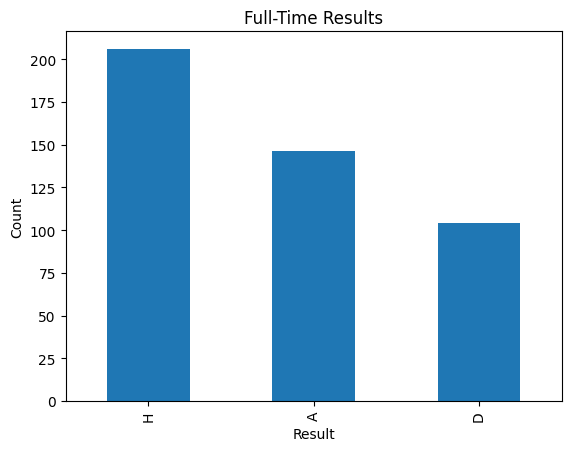

In [6]:
import matplotlib.pyplot as plt


homeTeam_counts = manUnited['HomeTeam'].value_counts()
awayTeam_counts = manUnited['AwayTeam'].value_counts()
ftr_counts = manUnited['FullTimeResult'].value_counts()
ref_counts = manUnited['Referee'].value_counts()
print(homeTeam_counts)
print(awayTeam_counts)
print(ftr_counts)
print(ref_counts)
manUnited[['FullTimeHomeGoals', 'FullTimeAwayGoals', 'HomeShotsOnTarget', 'AwayShotsOnTarget']].describe()

# plt.figure(figsize=(14, 8))
ftr_counts.plot(kind='bar')
plt.title('Full-Time Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


# Data Preprocessing
Dropping the columns that we do not need

In [7]:
data = manUnited.drop(['Div', 'FullTimeHomeGoals', 'FullTimeAwayGoals', 'Date'], axis = 1)
data.columns
data.shape

(456, 19)

### Further Data preprocessing

Splitting the data frame into input features (X) and target features (y). Our target features is the FinalTimeResult.

In [8]:
X = data.drop(['FullTimeResult'], axis =1)
y = data['FullTimeResult']

X.head()


,HomeTeam,AwayTeam,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,Referee,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,Man United,Birmingham,1.0,0.0,H,L Mason,26.0,6.0,17.0,4.0,13.0,7.0,13.0,2.0,1.0,1.0,0.0,0.0
1,Man United,Arsenal,0.0,1.0,A,M Dean,10.0,9.0,4.0,3.0,21.0,15.0,6.0,5.0,3.0,6.0,0.0,0.0
2,Man United,Man City,1.0,1.0,D,M Atkinson,21.0,10.0,11.0,6.0,15.0,14.0,11.0,1.0,2.0,2.0,0.0,0.0
3,Man United,Sunderland,0.0,1.0,A,A Wiley,17.0,4.0,9.0,3.0,11.0,15.0,14.0,1.0,2.0,3.0,0.0,1.0
4,Man United,Bolton,2.0,0.0,H,M Clattenburg,13.0,15.0,7.0,7.0,15.0,8.0,13.0,1.0,0.0,1.0,0.0,0.0


### Label Encoding

Label encoding categorical data, such as team names, and referee.

In [21]:
# from sklearn.preprocessing import LabelEncoder

# homeTeam_encoder = LabelEncoder()
# awayTeam_encoder = LabelEncoder()
# referee_encoder = LabelEncoder()

# # Fit and transform the categorical features with label encoding

# X['HomeTeam'] = homeTeam_encoder.fit_transform(X['HomeTeam'])
# X['AwayTeam'] = awayTeam_encoder.fit_transform(X['AwayTeam'])
# X['Referee'] = referee_encoder.fit_transform(X['Referee'])



# After deep research, I realized that one-hot encoding will work better on my model
X_encoded = pd.get_dummies(X)

print(X_encoded.dtypes)

HomeTeam               int64
AwayTeam               int64
HalfTimeHomeGoals    float64
HalfTimeAwayGoals    float64
Referee                int64
HomeShots            float64
AwayShots            float64
HomeShotsOnTarget    float64
AwayShotsOnTarget    float64
HomeFouls            float64
AwayFouls            float64
HomeCorners          float64
AwayCorners          float64
HomeYellowCards      float64
AwayYellowCards      float64
HomeRedCards         float64
AwayRedCards         float64
HalfTimeResult_A        bool
HalfTimeResult_D        bool
HalfTimeResult_H        bool
dtype: object


# Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Checking Class Distribution

In [52]:
class_distribution = y_train.value_counts(normalize=True)
print("Class distribution in training set:\n", class_distribution)

Class distribution in training set:
 FullTimeResult
H    0.429825
A    0.345029
D    0.225146
Name: proportion, dtype: float64


# Modeling

In [55]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import metrics
from sklearn.metrics import classification_report

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

random_forest = RandomForestClassifier(n_estimators=155, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6754385964912281

Classification Report:
               precision    recall  f1-score   support

           A       0.59      0.71      0.65        28
           D       0.48      0.37      0.42        27
           H       0.80      0.80      0.80        59

    accuracy                           0.68       114
   macro avg       0.62      0.63      0.62       114
weighted avg       0.67      0.68      0.67       114



# Model Visualization
### confusion matrix

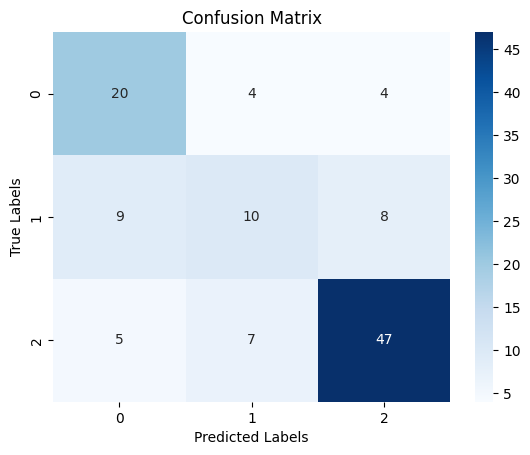

In [60]:
import seaborn as sns

con_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(con_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Feature Importance

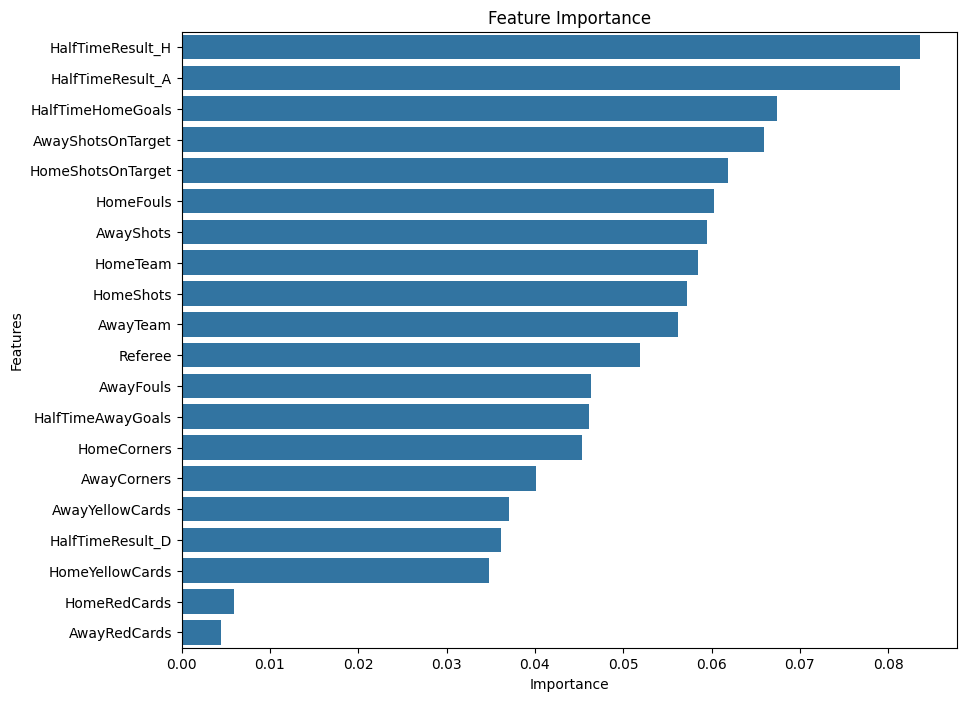

In [62]:
feature_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### tree visualization

In [65]:
!pip install graphviz

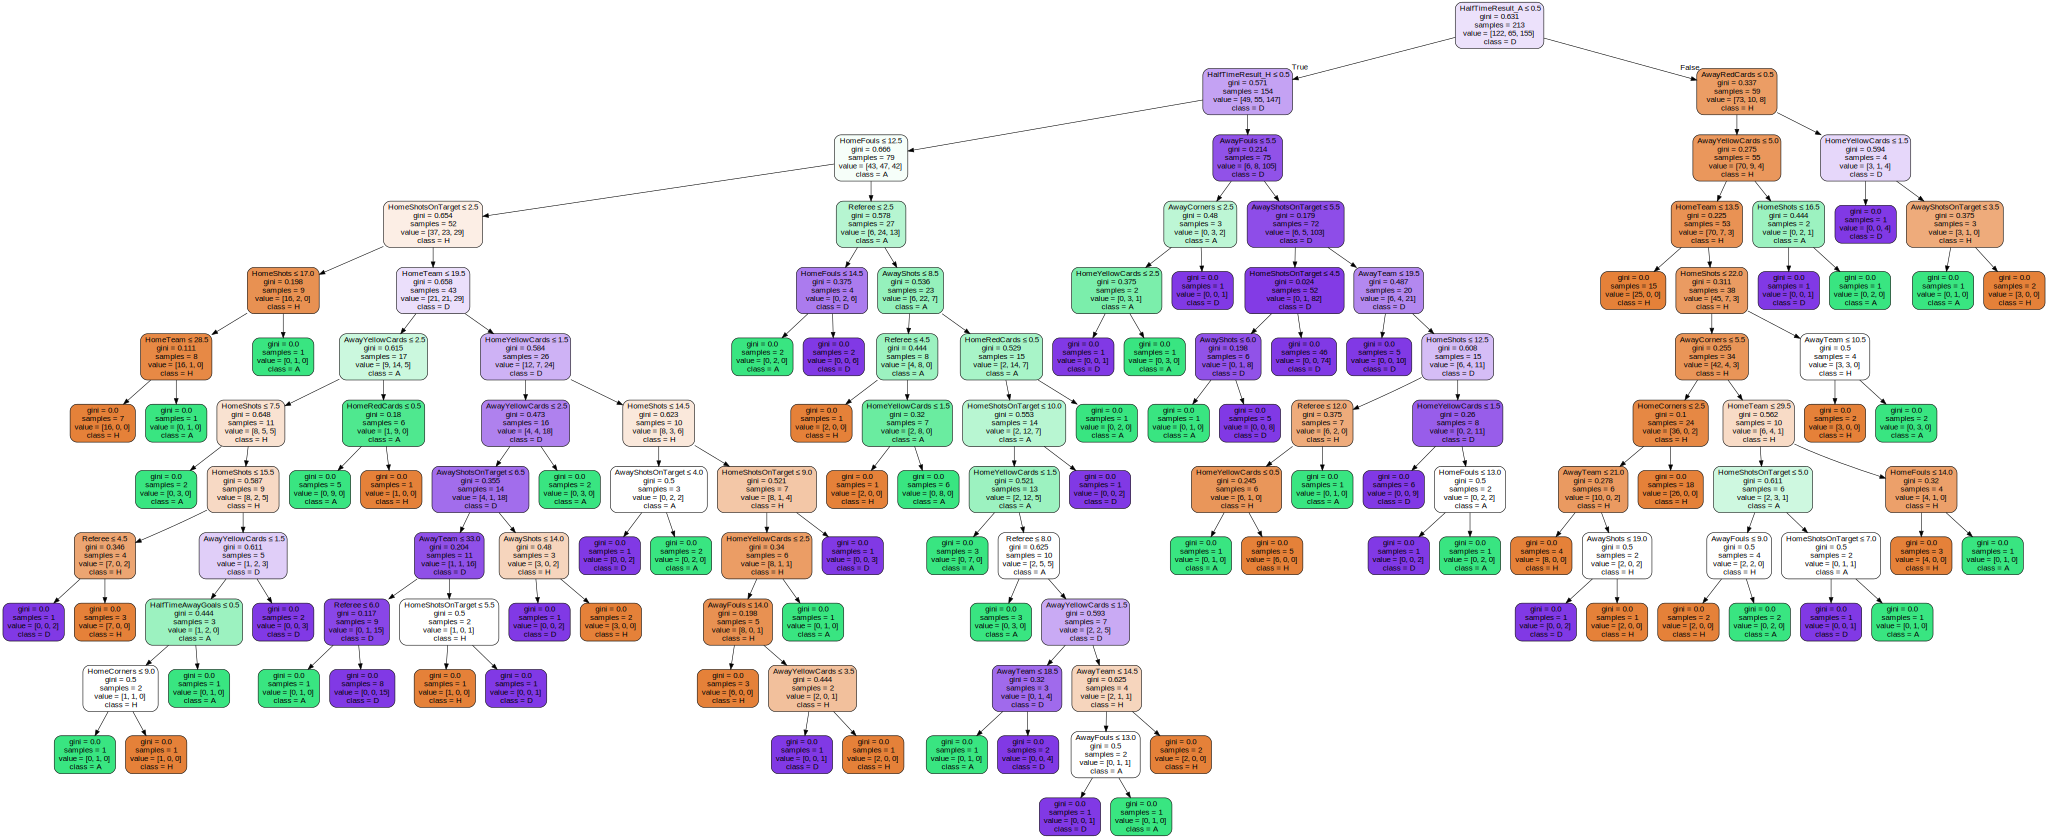

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree


# Select one tree from the forest
single_tree = random_forest.estimators_[0]

# Export the tree to a DOT format object
dot_data = tree.export_graphviz(single_tree, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['H', 'A', 'D'],
                                filled=True, rounded=True,
                                special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


#Feature Engineering

In [84]:
result_mapping = {'H': 3, 'A': 0, 'D': 1}  # Home win: 3 points, Away win: 0 points, Draw: 1 point
manUnited['ResultPoints'] = manUnited['FullTimeResult'].map(result_mapping)

# Calculating a simple form for the last 3 matches for each team
manUnited['HomeTeamForm'] = manUnited.groupby('HomeTeam')['ResultPoints'].transform(lambda x: x.rolling(3, min_periods=1).mean())
manUnited['AwayTeamForm'] = manUnited.groupby('AwayTeam')['ResultPoints'].transform(lambda x: x.rolling(3, min_periods=1).mean())


manUnited.drop('ResultPoints', axis=1, inplace=True)


X = manUnited.drop('FullTimeResult', axis=1)
y = manUnited['FullTimeResult']

In [85]:
X_encoded = pd.get_dummies(X)

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Hyperprameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [78]:
y_pred = best_model.predict(X_test)


print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Set Accuracy: 0.8321167883211679
Classification Report:
               precision    recall  f1-score   support

           A       0.72      0.91      0.81        34
           D       0.78      0.44      0.56        32
           H       0.91      0.97      0.94        71

    accuracy                           0.83       137
   macro avg       0.80      0.77      0.77       137
weighted avg       0.83      0.83      0.82       137



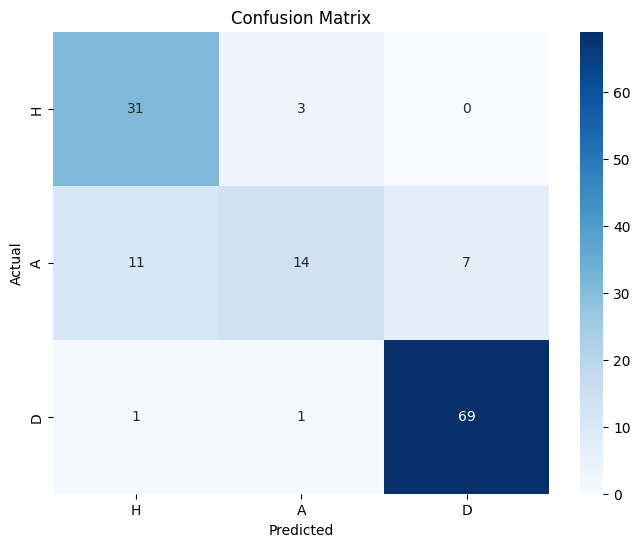

In [90]:
con_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(con_mat, index=['H', 'A', 'D'], columns=['H', 'A', 'D'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot = True, fmt = 'g', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

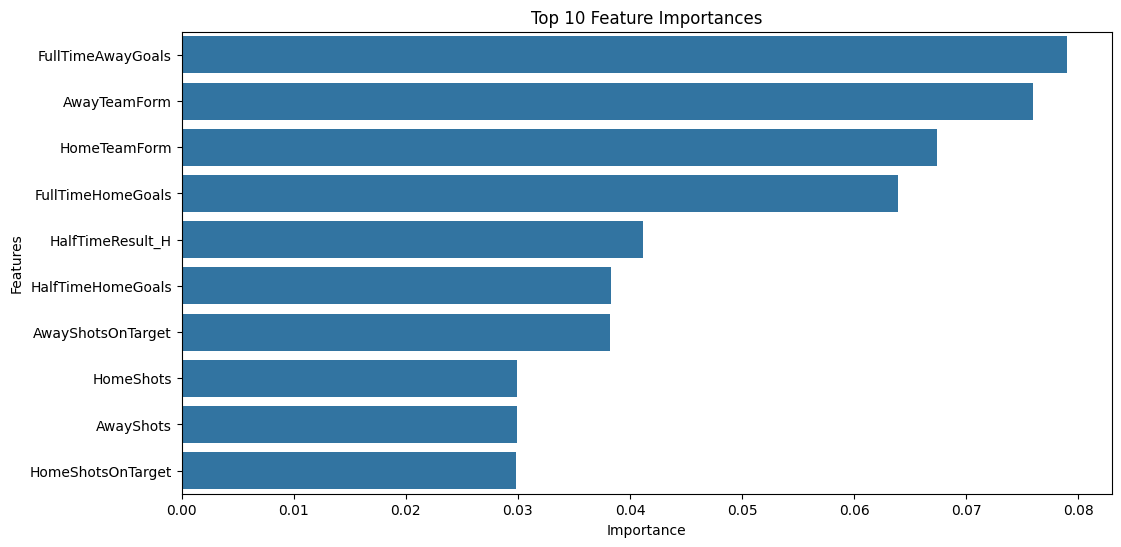

In [99]:
feature_importances = best_model.feature_importances_
features = X_train.columns

importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

